# 배경지식

- Hour - 시간
- Minute - 분
- DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
- DNI - 직달일사량(Direct Normal Irradiance (W/m2))
- WS - 풍속(Wind Speed (m/s))
- RH - 상대습도(Relative Humidity (%))
- T - 기온(Temperature (Degree C))
- Target - 태양광 발전량 (kW)


# module, data import 

In [84]:
import pandas as pd
import numpy as np
import os
import glob
import random
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [85]:
# train 데이터 불러오기
train = pd.read_csv('./data/train/train.csv')

In [86]:
df_train = train.copy()

In [87]:
# train 데이터 살펴보기
df_train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [88]:
# 제출 데이터 불러오기
submission = pd.read_csv('./data/sample_submission.csv')

In [89]:
# 제출 데이터 살펴보기
submission.tail()

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,80.csv_Day8_23h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 데이터 살펴보기

In [90]:
df_train.shape

(52560, 9)

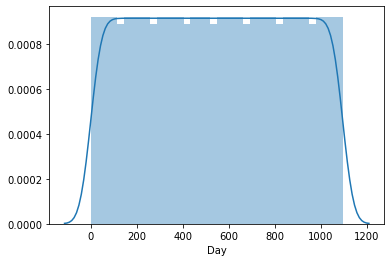

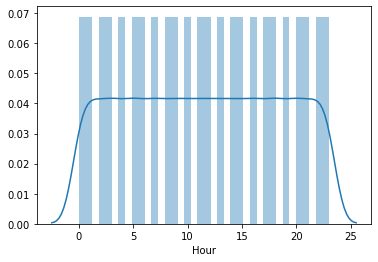

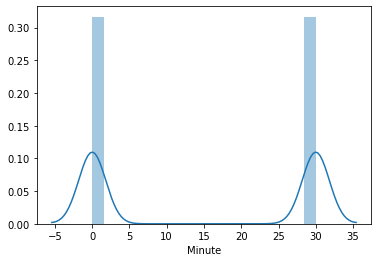

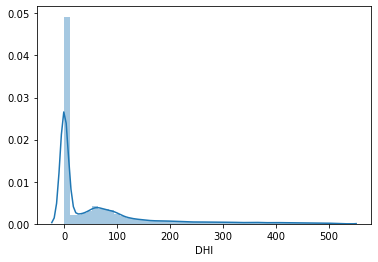

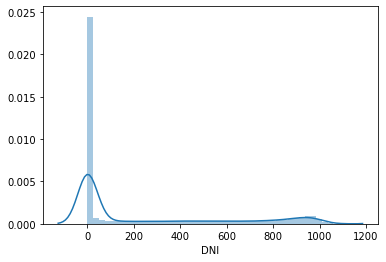

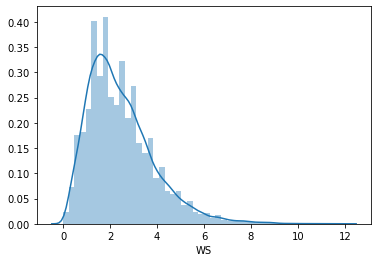

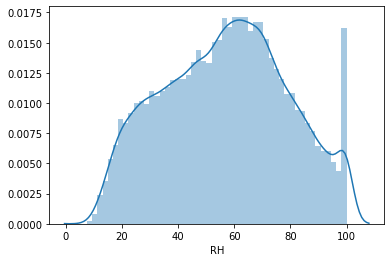

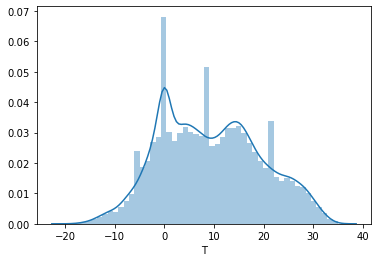

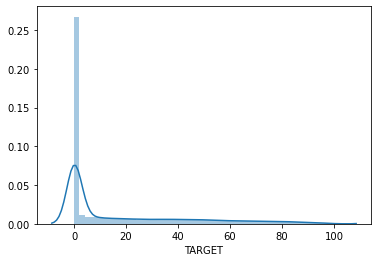

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
df=df_train
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [92]:
# NA 가 없음
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.6 MB


In [93]:
# 데이터의 type 은 잘 정의되어있다.(not categorical)
df_train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


# EDA

## Hour 분 더하기

In [94]:
def hour(df):
    df['Hour'] = df['Hour'] + df['Minute']/60
    return(df)

In [95]:
df_train = hour(df_train) 

In [96]:
df_train

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0.0,0,0,0,1.5,69.08,-12,0.0
1,0,0.5,30,0,0,1.5,69.06,-12,0.0
2,0,1.0,0,0,0,1.6,71.78,-12,0.0
3,0,1.5,30,0,0,1.6,71.75,-12,0.0
4,0,2.0,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21.5,30,0,0,2.4,70.70,-4,0.0
52556,1094,22.0,0,0,0,2.4,66.79,-4,0.0
52557,1094,22.5,30,0,0,2.2,66.78,-4,0.0
52558,1094,23.0,0,0,0,2.1,67.72,-4,0.0


## train : Day 삭제하기

In [97]:
df_train.drop(columns = ['Day'],inplace=True)

## train 1일후, 2일후 Target 추가

In [98]:
df_train['y_1day'] = df_train['TARGET'].shift(-48).fillna(method='ffill') # 48 단계 후의 값들을 불러온다. (1일 후의 값들)

In [99]:
df_train['y_2day'] = df_train['TARGET'].shift(-96).fillna(method='ffill') # 96 단계 후의의 값들을 불러온다. (2일 후의 값들)

In [100]:
df_train = df_train.iloc[:-96] # 맨 뒤 2일동안의 데이터는 예측할 true 값들이 없기때문에 의미가 없다. 즉 삭제

In [101]:
df_train

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,y_1day,y_2day
0,0.0,0,0,0,1.5,69.08,-12,0.0,0.0,0.0
1,0.5,30,0,0,1.5,69.06,-12,0.0,0.0,0.0
2,1.0,0,0,0,1.6,71.78,-12,0.0,0.0,0.0
3,1.5,30,0,0,1.6,71.75,-12,0.0,0.0,0.0
4,2.0,0,0,0,1.6,75.20,-12,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52459,21.5,30,0,0,3.5,55.97,-1,0.0,0.0,0.0
52460,22.0,0,0,0,3.9,54.23,-2,0.0,0.0,0.0
52461,22.5,30,0,0,4.1,54.21,-2,0.0,0.0,0.0
52462,23.0,0,0,0,4.3,56.46,-2,0.0,0.0,0.0


## Test set 불러오기

In [102]:
def preprocess_Test(df):
    temp = df.copy() # copy 를 떠야 에러가 안난다.
    temp = temp[['Hour','Minute', 'DHI', 'DNI', 'WS', 'RH', 'T','TARGET']]     
    return temp.iloc[-48:, :] 
# 이 때에 -48 로서 1일치만 가져온다는 뜻
# 왜냐하면, 위 모델의 경우 회귀가 단지 이전의 1일차의 값만 가지고 그 뒤 1,2일차의 예측을 하게 되기 떄문이다.

In [103]:
df_test = []
for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_Test(temp)
    df_test.append(temp) # 계속 append 해서 붙여준다.

In [104]:
X_test = pd.concat(df_test)
X_test.shape

(3888, 8)

# Hour 에 분 더하기

In [105]:
X_test=hour(X_test)

In [106]:
X_test

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
288,0.0,0,0,0,0.8,80.92,-2.8,0.0
289,0.5,30,0,0,0.9,81.53,-2.9,0.0
290,1.0,0,0,0,1.0,79.91,-3.0,0.0
291,1.5,30,0,0,0.9,79.91,-3.0,0.0
292,2.0,0,0,0,0.9,77.20,-3.0,0.0
...,...,...,...,...,...,...,...,...
331,21.5,30,0,0,0.8,63.35,13.7,0.0
332,22.0,0,0,0,0.7,64.82,13.1,0.0
333,22.5,30,0,0,0.7,66.10,12.8,0.0
334,23.0,0,0,0,0.6,67.64,12.4,0.0


## Test set 에도 Day 삭제 

In [107]:
df_train

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,y_1day,y_2day
0,0.0,0,0,0,1.5,69.08,-12,0.0,0.0,0.0
1,0.5,30,0,0,1.5,69.06,-12,0.0,0.0,0.0
2,1.0,0,0,0,1.6,71.78,-12,0.0,0.0,0.0
3,1.5,30,0,0,1.6,71.75,-12,0.0,0.0,0.0
4,2.0,0,0,0,1.6,75.20,-12,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52459,21.5,30,0,0,3.5,55.97,-1,0.0,0.0,0.0
52460,22.0,0,0,0,3.9,54.23,-2,0.0,0.0,0.0
52461,22.5,30,0,0,4.1,54.21,-2,0.0,0.0,0.0
52462,23.0,0,0,0,4.3,56.46,-2,0.0,0.0,0.0


# Train

In [108]:
# 이 떄에 주 계획은 오늘 데이터로 1일후, 2일 후 데이터를 둘다 근사시키겠다는 뜻 이다.
from sklearn.model_selection import train_test_split
# 1일 후의 값을 예측시키기 위해 
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
# 2일 후의 값을 예측시키기 위함
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

## 잘 나누어졌는지 살펴보기

In [109]:
X_train_1.head()

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
32908,14.0,0,19,0,2.3,63.64,3,1.783051
10140,6.0,0,45,473,1.8,66.74,19,12.103848
32182,11.0,0,77,929,2.2,39.56,13,56.300682
20953,12.5,30,310,525,1.5,23.71,15,65.401188
36079,15.5,30,70,536,0.5,46.63,0,19.614206


In [110]:
X_test.head()

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
288,0.0,0,0,0,0.8,80.92,-2.8,0.0
289,0.5,30,0,0,0.9,81.53,-2.9,0.0
290,1.0,0,0,0,1.0,79.91,-3.0,0.0
291,1.5,30,0,0,0.9,79.91,-3.0,0.0
292,2.0,0,0,0,0.9,77.20,-3.0,0.0


In [111]:
X_test.head()

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
288,0.0,0,0,0,0.8,80.92,-2.8,0.0
289,0.5,30,0,0,0.9,81.53,-2.9,0.0
290,1.0,0,0,0,1.0,79.91,-3.0,0.0
291,1.5,30,0,0,0.9,79.91,-3.0,0.0
292,2.0,0,0,0,0.9,77.20,-3.0,0.0


In [112]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [72]:
from lightgbm import LGBMRegressor

# Get the model and the predictions in (a) - (b)
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', # quantile regression 으로서 0.1 ~ 0.9 의 값을 체크한다.
                          alpha=q,
                          n_estimators=10000,
                          bagging_fraction=0.7,
                          learning_rate=0.027, 
                          subsample=0.7)                   
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=300, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

In [73]:
# Target 예측

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in quantiles:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=quantiles
    
    return LGBM_models, LGBM_actual_pred

In [74]:
# Target1
# Target1 은 하루 후의 데이터 예측이다.
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

0.1
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 1.34404
Early stopping, best iteration is:
[641]	valid_0's quantile: 1.34099
0.2
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.13289
[1000]	valid_0's quantile: 2.12587
Early stopping, best iteration is:
[868]	valid_0's quantile: 2.12378
0.3
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.53266
[1000]	valid_0's quantile: 2.51143
Early stopping, best iteration is:
[1132]	valid_0's quantile: 2.50819
0.4
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.66289
[1000]	valid_0's quantile: 2.63447
[1500]	valid_0's quantile: 2.62842
[2000]	valid_0's quantile: 2.61957
[2500]	valid_0's quantile: 2.61402
[3000]	valid_0's quantile: 2.61062
Early stopping, best iteration is:
[3127]	valid_0's quantile: 2.60916
0.5
Training until validation scores don't improve for 300 rounds
[500]	valid

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [75]:
# Target2
# Target2 는 이틀 뒤의 데이터 예측이다.
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, X_test)
results_2.sort_index()[:48]

0.1
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 1.39416
Early stopping, best iteration is:
[418]	valid_0's quantile: 1.3938
0.2
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.23931
[1000]	valid_0's quantile: 2.23944
Early stopping, best iteration is:
[883]	valid_0's quantile: 2.23608
0.3
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.66754
[1000]	valid_0's quantile: 2.64977
[1500]	valid_0's quantile: 2.63842
[2000]	valid_0's quantile: 2.63068
[2500]	valid_0's quantile: 2.62806
Early stopping, best iteration is:
[2423]	valid_0's quantile: 2.62784
0.4
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.79762
[1000]	valid_0's quantile: 2.78183
[1500]	valid_0's quantile: 2.77379
Early stopping, best iteration is:
[1392]	valid_0's quantile: 2.77302
0.5
Training until validation scores don't improve for 300 rounds
[500]	valid_

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [76]:
results_1.sort_index().iloc[:48]

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [78]:
results_2.sort_index()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
print(results_1.shape, results_2.shape)

(3888, 9) (3888, 9)


In [80]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results_1.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results_2.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
submission.iloc[:48]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.csv_Day7_0h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.csv_Day7_1h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.csv_Day7_1h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.csv_Day7_2h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.csv_Day7_2h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.csv_Day7_3h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.csv_Day7_3h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.csv_Day7_4h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.csv_Day7_4h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [82]:
submission.iloc[48:96]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
48,0.csv_Day8_0h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
49,0.csv_Day8_0h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50,0.csv_Day8_1h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
51,0.csv_Day8_1h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52,0.csv_Day8_2h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
53,0.csv_Day8_2h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54,0.csv_Day8_3h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55,0.csv_Day8_3h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
56,0.csv_Day8_4h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57,0.csv_Day8_4h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [83]:
submission.to_csv('./data/hanadool-submission.csv', index=False)